A program to fit the 1000 DRW that Chelsea earlier did, and compare the results , to ensure that the code I use does work indeed as she used it 

In [23]:
import os 
import subprocess
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np 
from astropy.table import  join

In [16]:
lcDir = '/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI/'
lcNames = os.listdir(lcDir)
lcNpoints = '400' # all lc have 400 pts here .... 

In [64]:
# Make a input.filter file, saying which filter we are using (1 = u,  5 = z )
f = open("input.filter", "w+")
f.write("1")
f.close()

# Make a process.dat file ...
f= open("process.dat","w+")

# write the header
Nlightcurves =  len(lcNames)
f.write(str(Nlightcurves)+" #ndata RA Dec redshift Absi fname \n")
# write the file lines 
for i in range(Nlightcurves):#len(lcNames)):
     f.write(lcNpoints + "   0       0       1     -25  " +   "'"+lcDir+lcNames[i]+ "'\n")
# close the file 
f.close()

In [18]:
lcNames

['DRWtestCeleriteZI_LC513.dat',
 'DRWtestCeleriteZI_LC275.dat',
 'DRWtestCeleriteZI_LC34.dat',
 'DRWtestCeleriteZI_LC261.dat',
 'DRWtestCeleriteZI_LC20.dat',
 'DRWtestCeleriteZI_LC507.dat',
 'DRWtestCeleriteZI_LC249.dat',
 'DRWtestCeleriteZI_LC936.dat',
 'DRWtestCeleriteZI_LC922.dat',
 'DRWtestCeleriteZI_LC711.dat',
 'DRWtestCeleriteZI_LC705.dat',
 'DRWtestCeleriteZI_LC739.dat',
 'DRWtestCeleriteZI_LC842.dat',
 'DRWtestCeleriteZI_LC856.dat',
 'DRWtestCeleriteZI_LC103.dat',
 'DRWtestCeleriteZI_LC665.dat',
 'DRWtestCeleriteZI_LC671.dat',
 'DRWtestCeleriteZI_LC117.dat',
 'DRWtestCeleriteZI_LC881.dat',
 'DRWtestCeleriteZI_LC659.dat',
 'DRWtestCeleriteZI_LC895.dat',
 'DRWtestCeleriteZI_LC498.dat',
 'DRWtestCeleriteZI_LC467.dat',
 'DRWtestCeleriteZI_LC301.dat',
 'DRWtestCeleriteZI_LC315.dat',
 'DRWtestCeleriteZI_LC473.dat',
 'DRWtestCeleriteZI_LC329.dat',
 'DRWtestCeleriteZI_LC328.dat',
 'DRWtestCeleriteZI_LC314.dat',
 'DRWtestCeleriteZI_LC472.dat',
 'DRWtestCeleriteZI_LC466.dat',
 'DRWtestC

Run the compiled fortran program : 

In [29]:
bashCommand = "./qso.out"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

In [5]:
outDir = '1000_DRW_results/'


In [9]:
# NOTE : log here is the log_10 !   

# fort.40 columns (rows are same as in process.dat): 
#  PRH method         
# ----
# edge      ; edge flag -- 1 on edge of grid, 2 too close to edge to properly centroid peak
# mu        ; average magnitude (best estimate from PR method)
# maxlike   : max likelihood                               
# minchi    ; min chi^2                                    
# minchired ; min chi^2/dof                                
# sigma     ; best sigma (log)                             
# sig_err_lo; 1-sigma lower limit on sigma (log) (Bayesian)
# sig_err_hi; 1-sigma upper limit on sigma (log) (Bayesian)
# tau        ; best tau (log)                             
# tau_err_lo ; 1-sigma lower limit on tau (log) (Bayesian)
# tau_err_hi ; 1-sigma upper limit on tau (log) (Bayesian)
# tau_med    ; median tau (log) (Bayesian)
# sig_med     ; median sigma (log) (Bayesian)

fit_results = Table.read(outDir+'fort.40', format='ascii', 
                         names=['edge','mu', 'maxlike','minchi','minchired', 'log_sigma' ,
 'log_sig_err_lo','log_sig_err_hi','log_tau','log_tau_err_lo','log_tau_err_hi',
 'log_tau_med','log_sig_med', 'fname']  )

# fort.39  columns : 
# ----
# index    ,$;index
# z_pr     ,$;redshift
# distmod  ,$;dist modulus
# mi_pr    ,$;M_i
# muinit   ,$;initial estimate of mean mag
# chiconst ,$;chi^2 for fitting LC as constant
# chilinear,$;chi^2 for fitting it as a linear trend
# Pnoise   ,$;Pnoise = likelihood of noise solution 
# Pinf     ,$;Pinf   = likekihood of tau->infinity  
# Plike    ,$;Plike  = PR likelihood                
# chinoise ,$;chi^2 of noise                        
# chiinf   ,$;chi^2 of tau->infintiy                
# chi_pr   ,$;chi^2 of PR result                    
# signoise ,$;log(sigma) of noise                   
# siginf   ,$;log(sigma) of inf                     
# npts       ;# points in lightcurve"

fit_stats = Table.read(outDir+'fort.39', format='ascii', 
                    names=['index', 'redshift', 'distance_modulus',
                          'M_i', 'mean_mag', 'chi2const', 'chi2linear',
                        'Pnoise', 'Pinf', 'Plike', 'chi2noise',
                          'chi2inf', 'chi2pr', 'logSigNoise',
                          'logSigInf', 'npts', 'fname'])

In [19]:
fit_results['lcname'] = lcNames

(array([  2.,   2.,   8.,  14.,  21.,  36.,  44.,  70.,  59.,  57.,  81.,
         93.,  56.,  50.,  49.,  58.,  48.,  26.,  27.,  29.,  28.,  26.,
         23.,  16.,  10.,  10.,   9.,   8.,   9.,   5.,   2.,   3.,   0.,
          3.,   2.,   3.,   2.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   1.,   1.,   2.]),
 array([  31.12303922,   36.00100025,   40.87896128,   45.7569223 ,
          50.63488333,   55.51284436,   60.39080539,   65.26876642,
          70.14672745,   75.02468847,   79.9026495 ,   84.78061053,
          89.65857156,   94.53653259,   99.41449362,  104.29245464,
         109.17041567,  114.0483767 ,  118.92633773,  123.80429876,
         128.68225979,  133.56022082,  138.43818184,  143.31614287,
         148.1941039 ,  153.07206493,  157.95002596,  162.82798699,
         167.70594801,  172.58390904,  177.46187007,  182.3398311 ,
         187.21779213,  192.09575316,  196.97371418,  201.85167521,
         206.72963624,  211.60759727,  216.485

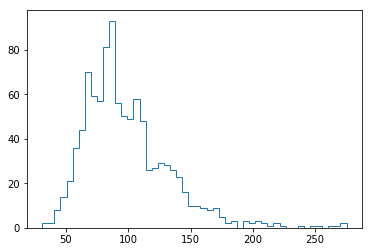

In [10]:
%matplotlib inline

plt.hist(np.power(10,fit_results['log_tau']), bins=50, histtype='step')

Compare with earlier results of Chelsea fitting the same light curves ... 

In [21]:
fit_results[:10]

edge,mu,maxlike,minchi,minchired,log_sigma,log_sig_err_lo,log_sig_err_hi,log_tau,log_tau_err_lo,log_tau_err_hi,log_tau_med,log_sig_med,fname,lcname
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str65,str28
0,-0.018362,1009.727754,373.373247,0.940487,-0.263525,-0.298179,-0.259054,2.144665,2.005945,3.334938,2.256944,-0.278617,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC513.dat
0,0.019489,1024.459044,373.658077,0.943581,-0.262177,-0.296563,-0.258734,1.904359,1.742865,2.099786,1.882101,-0.277649,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC275.dat
0,-0.102098,1021.317318,374.772473,0.944011,-0.262263,-0.296789,-0.258786,2.114429,1.963254,3.098073,2.191012,-0.277787,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC34.dat
0,-0.078941,1007.487807,403.504841,1.016385,-0.246583,-0.292177,-0.257508,1.937096,1.811342,2.346371,1.97542,-0.274843,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC261.dat
0,-0.00535,1024.208905,373.823548,0.943999,-0.262132,-0.296498,-0.258722,1.905878,1.744408,2.098683,1.882988,-0.27761,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC20.dat
0,-0.149293,1014.418913,367.485976,0.927995,-0.266159,-0.309431,-0.259832,1.999954,1.839537,2.410973,2.013747,-0.281061,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC507.dat
0,0.025265,1006.048403,412.213416,1.040943,-0.241661,-0.291865,-0.256503,1.722341,1.605334,1.857784,1.708967,-0.274184,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC249.dat
0,0.05802,1021.682214,386.768281,0.974227,-0.25628,-0.293664,-0.258144,1.951971,1.811095,2.367194,1.977737,-0.275904,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC936.dat
0,0.104758,1041.67993,424.324185,1.068827,-0.284921,-0.341368,-0.304121,2.093379,1.988839,3.357301,2.246871,-0.322744,/Users/chris/GradResearch/DRW_Celerite/raw_data/DRWtestCeleriteZI,DRWtestCeleriteZI_LC922.dat


In [11]:
fits = Table.read('../../../DRW_Celerite/data_products/Fig_Celerite_ZI_LC_fits/'+'fits.dat', 
                  format='ascii')
fits.rename_column('col1', 'lcname')
tau_fit = np.power(10,fits['col3'].data)
sigma_hat = np.power(10, fits['col4'].data)
sigma_fit = sigma_hat / np.sqrt(2 / (tau_fit/365.0)) 

In [30]:
combine = join(fit_results, fits)

(array([  66.,  109.,  112.,  132.,   39.,  143.,  126.,  121.,  104.,   48.]),
 array([ -5.00000000e-06,  -4.00000000e-06,  -3.00000000e-06,
         -2.00000000e-06,  -1.00000000e-06,   0.00000000e+00,
          1.00000000e-06,   2.00000000e-06,   3.00000000e-06,
          4.00000000e-06,   5.00000000e-06]),
 <a list of 10 Patch objects>)

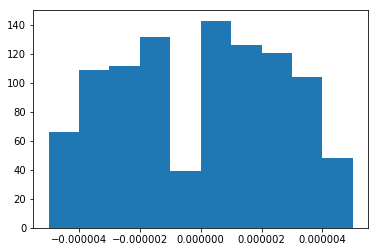

In [35]:
plt.hist(combine['log_tau'] - combine['col3'])

The results are identical up to a decimal point stored numerically. 